Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
import joblib


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Load Data

In [2]:
df = pd.read_csv(r"C:\Users\ezath\Downloads\train (1).csv")

Show Data

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Data Cleaning

Check for Null Values

In [10]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Handle Missing Values

In [11]:
if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda s: s.fillna(s.median())
    )

In [12]:
none_cats = [
    'Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
    'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'
]
for c in none_cats:
    if c in df.columns:
        df[c] = df[c].fillna('None')


In [13]:
for c in ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
          'GarageYrBlt','GarageArea','GarageCars']:
    if c in df.columns:
        df[c] = df[c].fillna(0)

In [14]:
df.dropna(subset=['Electrical'],inplace=True)

Check for Duplicated Values

In [15]:
df.duplicated().sum()

np.int64(0)

Check For Outliers

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if df[(df[col] < lower) | (df[col] > upper)].shape[0] > 0:
        outlier_cols.append(col)

print(f"cols_Outliers: {outlier_cols}")

cols_Outliers: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


Handle Outliers by Clipping

In [17]:
clipping_cols = [
    'LotFrontage','LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF',
    'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF', 'TotalBsmtSF',
    'EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','PoolArea','BsmtUnfSF'
    
]

for col_2 in clipping_cols:
    Q1 = df[col_2].quantile(0.25)
    Q3 = df[col_2].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    
    df[col_2] = df[col_2].clip(lower, upper)

print(f"Clipping applied to: {clipping_cols}")
print(f"Number of rows after clipping: {df.shape[0]}")


Clipping applied to: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'TotalBsmtSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea', 'BsmtUnfSF']
Number of rows after clipping: 1459


Handle Outliers by Remove

In [18]:
remove = [
    'MSSubClass','OverallQual', 'OverallCond',
    'BsmtFinSF1','2ndFlrSF','1stFlrSF',
    'BsmtFullBath', 'BsmtHalfBath','BedroomAbvGr', 'KitchenAbvGr', 
    'TotRmsAbvGrd', 'Fireplaces','GarageCars','YearBuilt'
]

for col_3 in remove:
    Q1 = df[col_3].quantile(0.25)
    Q3 = df[col_3].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col_3] >= lower) & (df[col_3] <= upper)]

print(f"removed_cols_outliers: {remove}")
print(f"Number of rows after removing: {df.shape[0]}")



removed_cols_outliers: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', '2ndFlrSF', '1stFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YearBuilt']
Number of rows after removing: 1081


EDA Viualization

In [19]:
numeric_df=df.select_dtypes(include=['int64','float64'])
top_features = numeric_df.corr()['SalePrice'].abs().sort_values(ascending=False).head(11).index


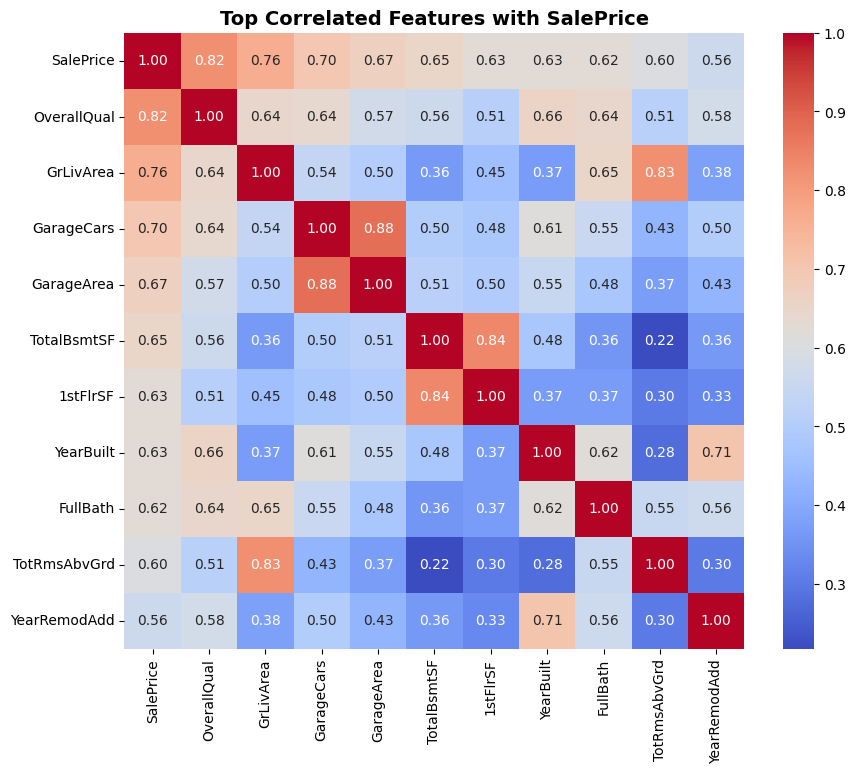

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice", fontsize=14, fontweight='bold')
plt.show()


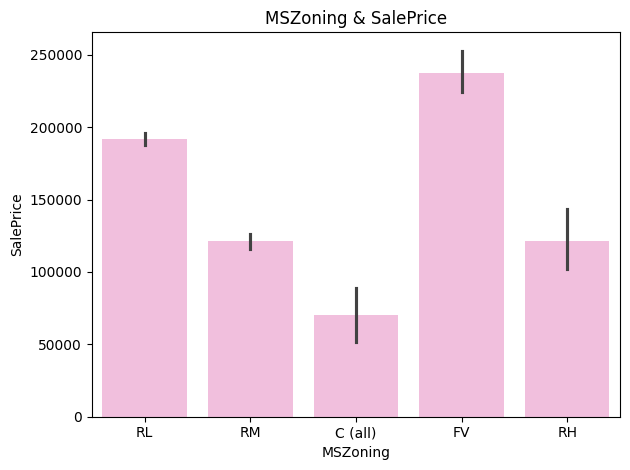

In [21]:
sns.barplot(data=df,x=df['MSZoning'], y=df['SalePrice'], color='#F9B7DFFF')
plt.title("MSZoning & SalePrice")
plt.tight_layout()
plt.show()

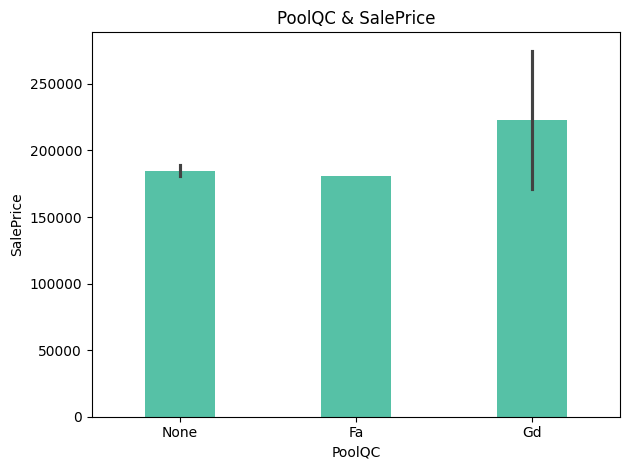

In [22]:
sns.barplot(data=df,x=df['PoolQC'], y=df['SalePrice'], color="#44D3AFFF",width=0.4)
plt.title("PoolQC & SalePrice")
plt.tight_layout()
plt.show()

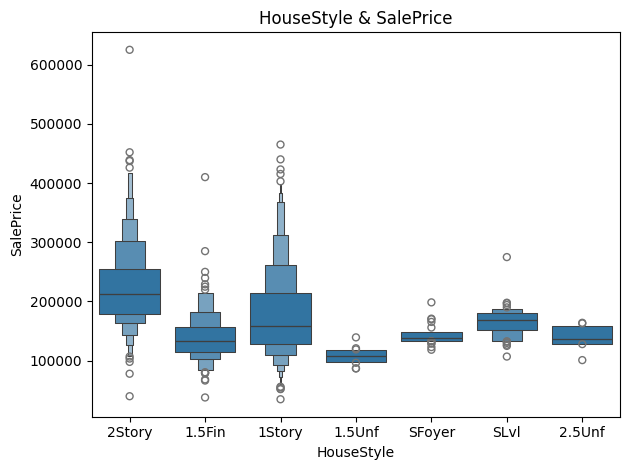

In [23]:
sns.boxenplot(x=df['HouseStyle'],y=df['SalePrice'],data=df)
plt.title("HouseStyle & SalePrice")
plt.tight_layout()
plt.show()

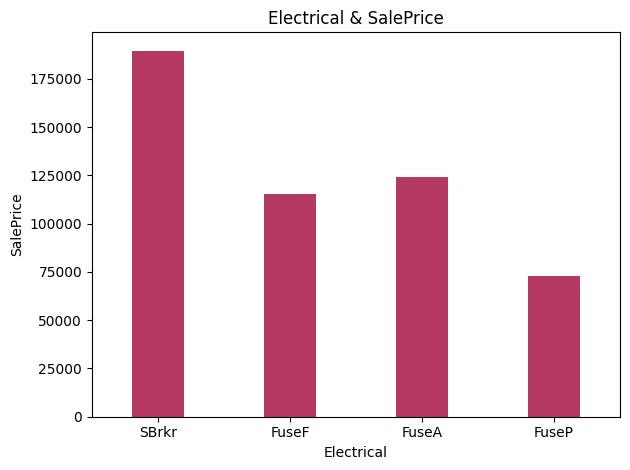

In [24]:
sns.barplot(data=df,x=df['Electrical'], y=df['SalePrice'], color="#C8245AFF",width=0.4,errorbar=None)
plt.title("Electrical & SalePrice")
plt.tight_layout()
plt.show()

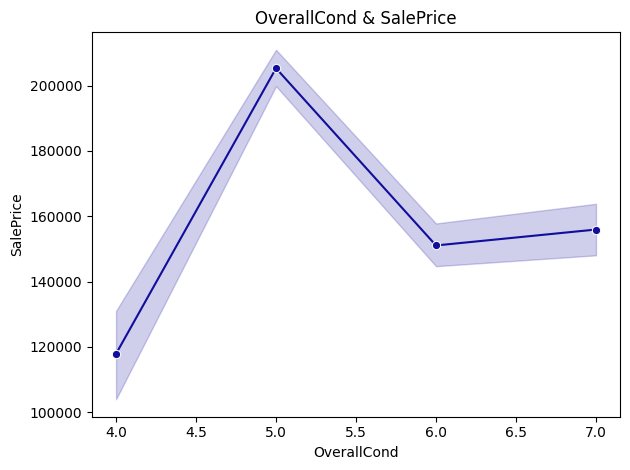

In [25]:
sns.lineplot(data=df,x=df['OverallCond'],y=df['SalePrice'],color="#100E9BFF",marker='o')
plt.title("OverallCond & SalePrice")
plt.tight_layout()
plt.show()

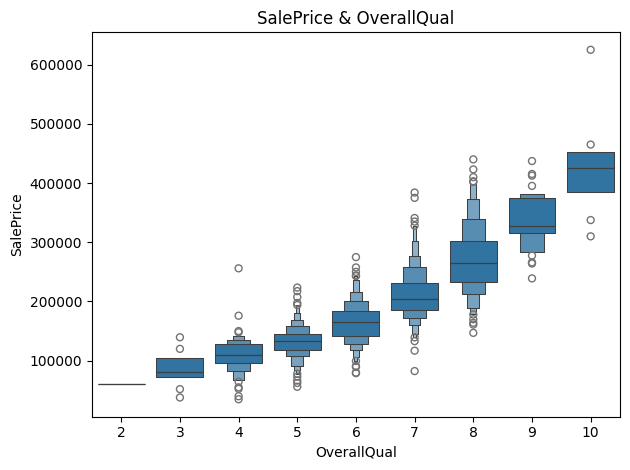

In [26]:
sns.boxenplot(x=df['OverallQual'],y=df['SalePrice'],data=df)
plt.title('SalePrice & OverallQual')
plt.tight_layout()
plt.show()

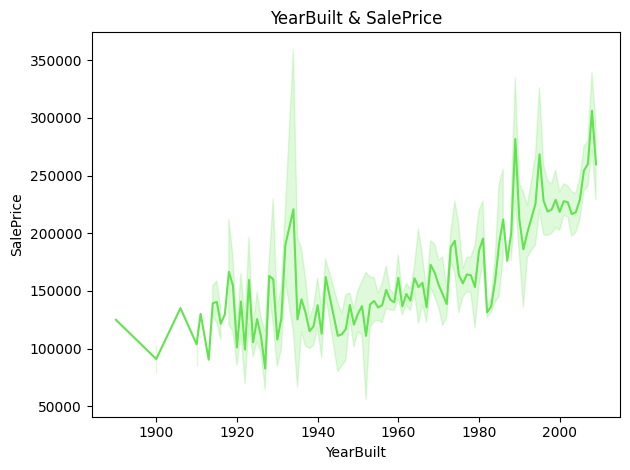

In [27]:
sns.lineplot(x=df['YearBuilt'],y=df['SalePrice'],data=df,color="#62E34FFF")
plt.title("YearBuilt & SalePrice")
plt.tight_layout()
plt.show()

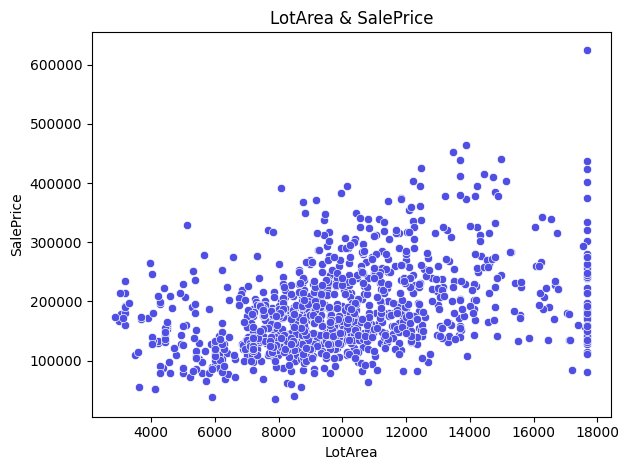

In [28]:
sns.scatterplot(x=df['LotArea'],y=df['SalePrice'],data=df,color="#4F4FE3FF")
plt.title("LotArea & SalePrice")
plt.tight_layout()
plt.show()

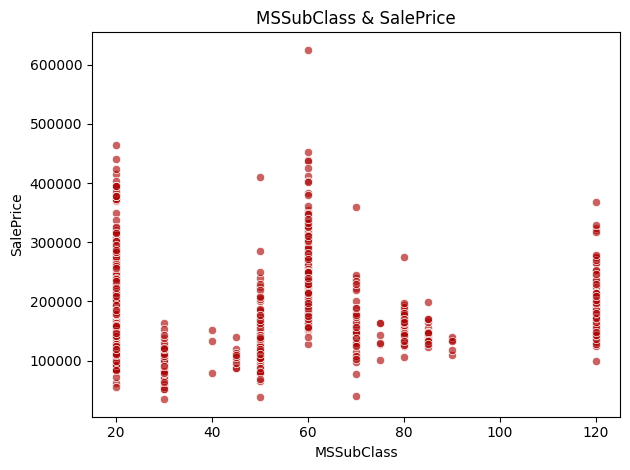

In [29]:
sns.scatterplot(x=df['MSSubClass'],y=df['SalePrice'],data=df,color="#AE0505A1")
plt.title("MSSubClass & SalePrice")
plt.tight_layout()
plt.show()

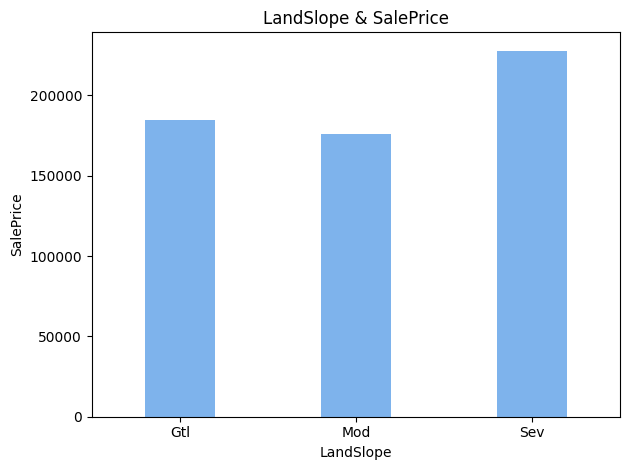

In [30]:
sns.barplot(data=df,x=df['LandSlope'], y=df['SalePrice'], color="#6CB3FEFF",width=0.4,errorbar=None)
plt.title("LandSlope & SalePrice")
plt.tight_layout()
plt.show()

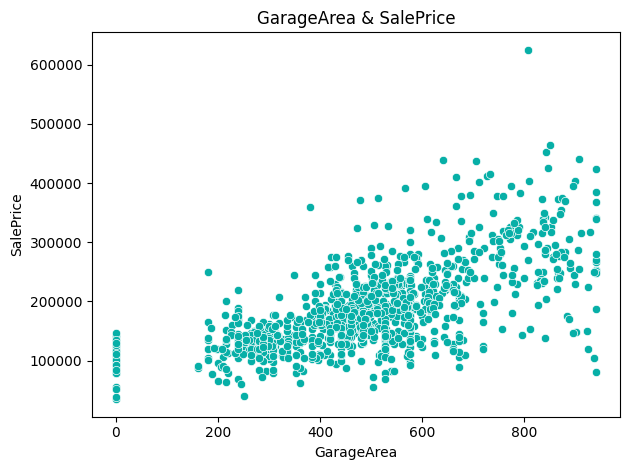

In [31]:
sns.scatterplot(data=df,x=df['GarageArea'], y=df['SalePrice'], color="#07AFA7FF")
plt.title("GarageArea & SalePrice")
plt.tight_layout()
plt.show()

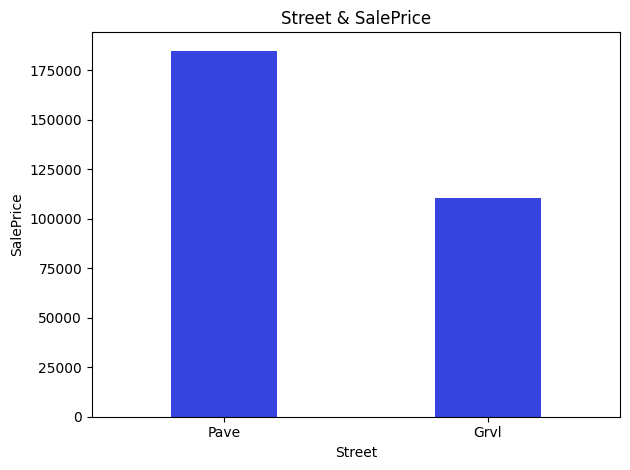

In [32]:
sns.barplot(data=df,x=df['Street'], y=df['SalePrice'], color="#1B2EFAFF",width=0.4,errorbar=None)
plt.title("Street & SalePrice")
plt.tight_layout()
plt.show()

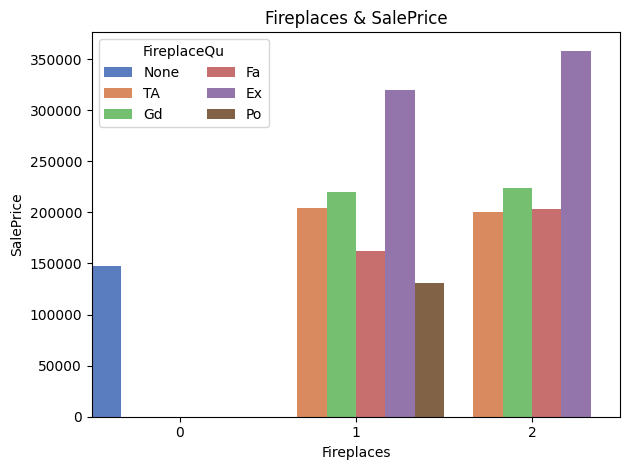

In [33]:
sns.barplot(x=df['Fireplaces'],y=df['SalePrice'],hue=df['FireplaceQu'],palette='muted',width=1,errorbar=None)
plt.title("Fireplaces & SalePrice")
plt.legend(title='FireplaceQu',loc='upper left',ncol=2)
plt.tight_layout()
plt.show()

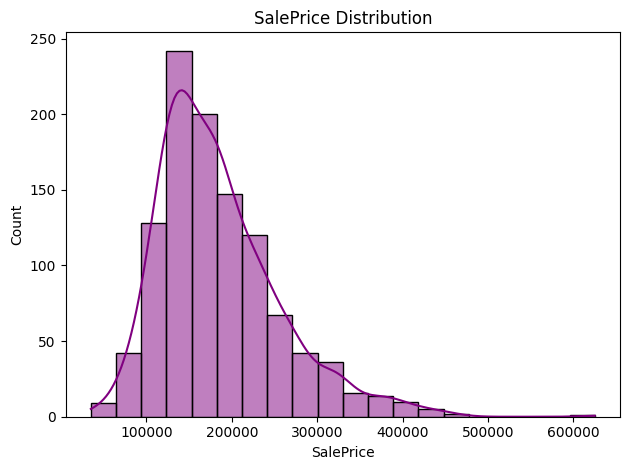

In [34]:
sns.histplot(data=df,bins=20,x=df['SalePrice'],kde=True,color='purple')
plt.title("SalePrice Distribution")
plt.tight_layout()
plt.show()

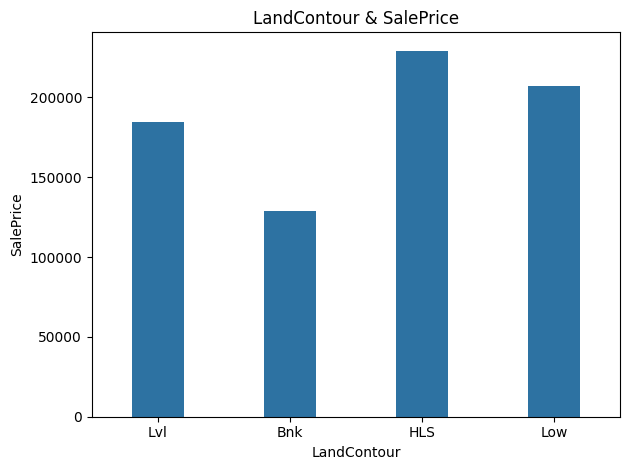

In [35]:
sns.barplot(data=df,x=df['LandContour'], y=df['SalePrice'], color="#1976B5",width=0.4,errorbar=None)
plt.title("LandContour & SalePrice")
plt.tight_layout()
plt.show()

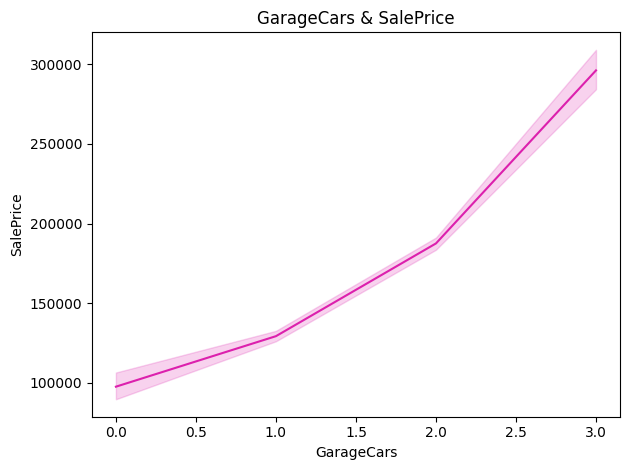

In [36]:
sns.lineplot(data=df,x=df['GarageCars'], y=df['SalePrice'], color="#DC20AD")
plt.title("GarageCars & SalePrice")
plt.tight_layout()
plt.show()

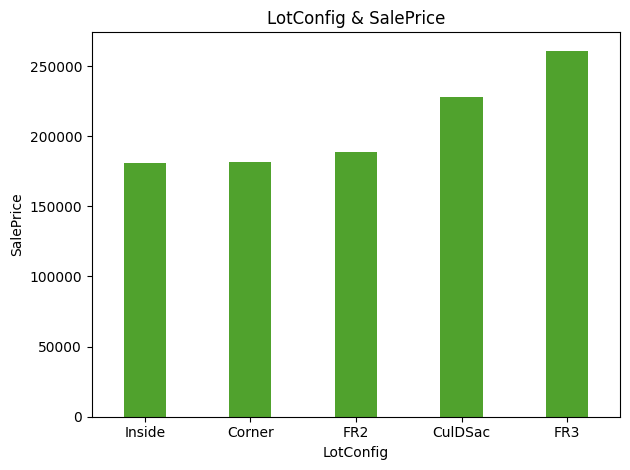

In [37]:

sns.barplot(data=df,x=df['LotConfig'], y=df['SalePrice'], color="#48B519",width=0.4,errorbar=None)
plt.title("LotConfig & SalePrice")
plt.tight_layout()
plt.show()

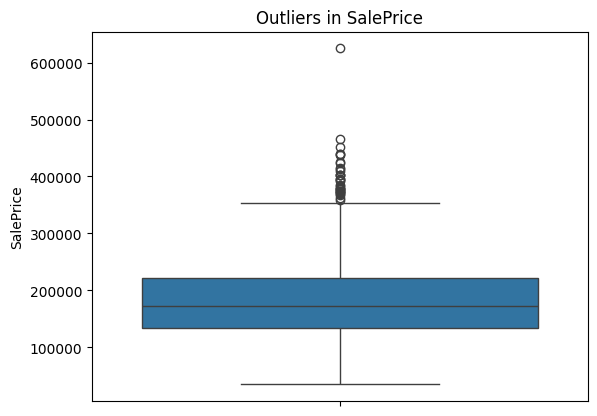

In [38]:
sns.boxplot(y=df['SalePrice'],data=df)
plt.title("Outliers in SalePrice")
plt.show()

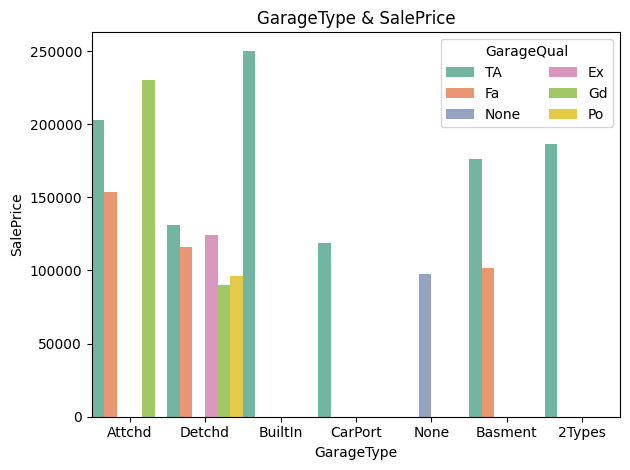

In [39]:
sns.barplot(x=df['GarageType'],y=df['SalePrice'],hue=df['GarageQual'],palette='Set2',width=1,errorbar=None)
plt.title("GarageType & SalePrice")
plt.legend(title='GarageQual',loc='upper right',ncol=2)
plt.tight_layout()
plt.show()

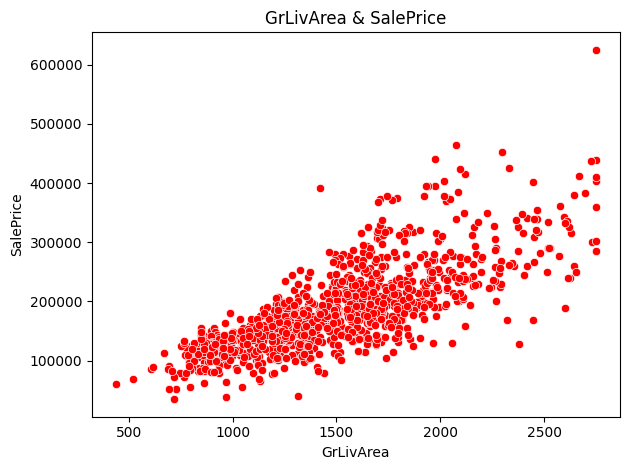

In [40]:
sns.scatterplot(x=df['GrLivArea'],y=df['SalePrice'],color='red')
plt.title('GrLivArea & SalePrice')
plt.tight_layout()
plt.show()

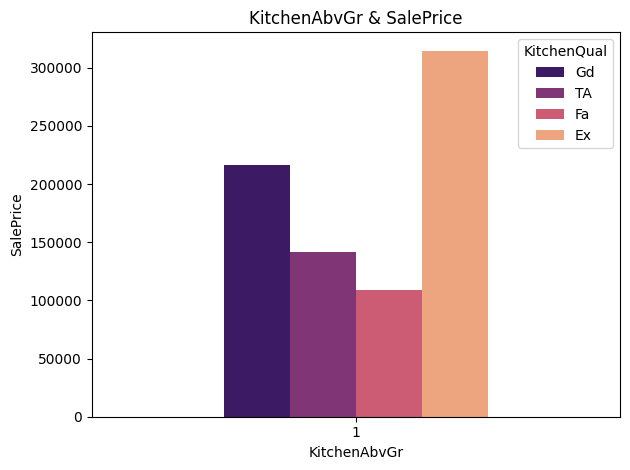

In [41]:
sns.barplot(x=df['KitchenAbvGr'],y=df['SalePrice'],hue=df['KitchenQual'],palette='magma',width=0.5,errorbar=None)
plt.title("KitchenAbvGr & SalePrice")
plt.legend(title='KitchenQual',loc='upper right',ncol=1)
plt.tight_layout()
plt.show()

Feature Engineering

In [42]:
df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]
df["Age"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]


Encoding Data

In [43]:
qual_map = {"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5}
ordinal_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond',
                'HeatingQC','KitchenQual','FireplaceQu',
                'GarageQual','GarageCond','PoolQC']

for col in ordinal_cols:
    if col in df.columns:
        df[col] = df[col].map(qual_map).fillna(0).astype(int)

In [44]:
nominal_cols = [
    'MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
    'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation',
    'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir',
    'Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence',
    'MiscFeature','SaleType','SaleCondition'
]
df = pd.get_dummies(df, columns=[c for c in nominal_cols if c in df.columns], drop_first=True)

In [45]:
if 'Id' in df.columns:
    df.drop(columns=['Id'],inplace=True)

In [46]:
joblib.dump(df.drop('SalePrice', axis=1).columns,"columns.pkl")

['columns.pkl']

Scaling Data

In [47]:
scaler = StandardScaler()

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Feature Selection

In [48]:
X = X_scaled
y = df['SalePrice']

In [49]:
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

lasso = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso.fit(X_imputed, y)

lasso_coef = pd.Series(lasso.coef_, index=X_imputed.columns)
top_lasso = lasso_coef[lasso_coef != 0].sort_values(ascending=False).head(15)
print(top_lasso)

TotalSF                  28674.388342
OverallQual              12654.525456
Neighborhood_NridgHt      7060.541753
2ndFlrSF                  6082.310192
BsmtExposure_Gd           4841.453103
SaleCondition_Partial     4684.644386
OverallCond               4318.342324
LotArea                   4025.711316
BsmtQual                  3561.316042
GarageCars                3483.744607
BsmtFinType1_None         3479.396201
KitchenQual               3453.861849
Neighborhood_NoRidge      3375.525939
BsmtFinSF1                3190.559001
ExterQual                 3059.609773
dtype: float64


In [50]:
features_lasso = [
    "2ndFlrSF","OverallQual","1stFlrSF","TotalBsmtSF","Neighborhood_NridgHt",
    "BsmtFinSF1","BsmtExposure_Gd","SaleCondition_Partial","GrLivArea",
    "OverallCond","YearBuilt","LotArea","BsmtQual","Neighborhood_NoRidge",
    "KitchenQual"
]

In [51]:
X = df[features_lasso].copy().fillna(0)
y = df['SalePrice']

Split Data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Evaluation

In [53]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: \nR²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

Linear Regression

In [54]:
lr = LinearRegression()
evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test)

Linear Regression: 
R²: 0.9060, MAE: 16066.43, RMSE: 21607.50


Lasso Regression

In [55]:
lasso_model = Lasso(alpha=0.001, max_iter=10000, random_state=42)
evaluate_model("Lasso Regression", lasso_model, X_train, y_train, X_test, y_test)

Lasso Regression: 
R²: 0.9060, MAE: 16066.43, RMSE: 21607.50


Random Forest

In [56]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)

Random Forest: 
R²: 0.8935, MAE: 16058.62, RMSE: 23002.54


 Gradient Boosting

In [57]:
gb = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
evaluate_model("Gradient Boosting", gb, X_train, y_train, X_test, y_test)

Gradient Boosting: 
R²: 0.9093, MAE: 15368.06, RMSE: 21223.59


XGBoost 

In [58]:
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
evaluate_model("XGBoost", xgb, X_train, y_train, X_test, y_test)

XGBoost: 
R²: 0.8996, MAE: 15715.87, RMSE: 22337.78


Voting Regressor

In [59]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=200, random_state=42)
model3 = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
model4 = XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)

In [60]:
voting_reg = VotingRegressor([
    ('lr', model1),
    ('rf', model2),
    ('gb', model3),
    ('xgb', model4)
])

In [61]:
evaluate_model("Voting Regressor (LR+RF+GB+XGB)", voting_reg, X_train, y_train,X_test,y_test)

Voting Regressor (LR+RF+GB+XGB): 
R²: 0.9166, MAE: 14503.50, RMSE: 20352.61


In [62]:
X_final = X.copy()
y_final = y.copy()

voting_reg.fit(X_final, y_final)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(n_estimators=200,
                                                   random_state=42)),
                            ('gb',
                             GradientBoostingRegressor(n_estimators=300,
                                                       random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=N...
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.05, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=500,
                                          n_jobs=None, num_parallel_tree=None, ...))])

In [63]:
joblib.dump(voting_reg, "final_model.pkl")    
joblib.dump(scaler, "scaler.pkl")            
joblib.dump(features_lasso, "features.pkl") 

['features.pkl']